In [1]:
# Install required libraries
#%pip install kagglehub


### Importing libraries

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import shutil
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### Load and Display Dataset

In [2]:
data_folder = './financial_data'
kaggle_data_path = kagglehub.dataset_download("ealaxi/paysim1")

for item in os.listdir(kaggle_data_path):
    shutil.move(os.path.join(kaggle_data_path, item), os.path.join(data_folder, item))

In [3]:
file_path = os.path.join(data_folder, 'PS_20174392719_1491204439457_log.csv')
data = pd.read_csv(file_path)

In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [5]:
data.tail(10)

step      type      amount     nameOrig  oldbalanceOrg  \
6362610   742  TRANSFER    63416.99   C778071008       63416.99   
6362611   742  CASH_OUT    63416.99   C994950684       63416.99   
6362612   743  TRANSFER  1258818.82  C1531301470     1258818.82   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362614   743  TRANSFER   339682.13  C2013999242      339682.13   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362610             0.0  C1812552860            0.00            0.00        1   
6362611             0.0  C1662241365       276433.18       339850.17        1   
6362612             0.0  C1470998563            0.00            0.00        1   
6362613             0.0  C1240760502       503464.50      1762283.33        1   
6362614             0.0  C1850423904            0.00            0.00        1   
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362610               0  
6362611               0  
6362612               0  
6362613               0  
6362614               0  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0

In [6]:
(((data['isFraud'].value_counts())/len(data))*100).round(2)
data['isFraud'].value_counts()
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

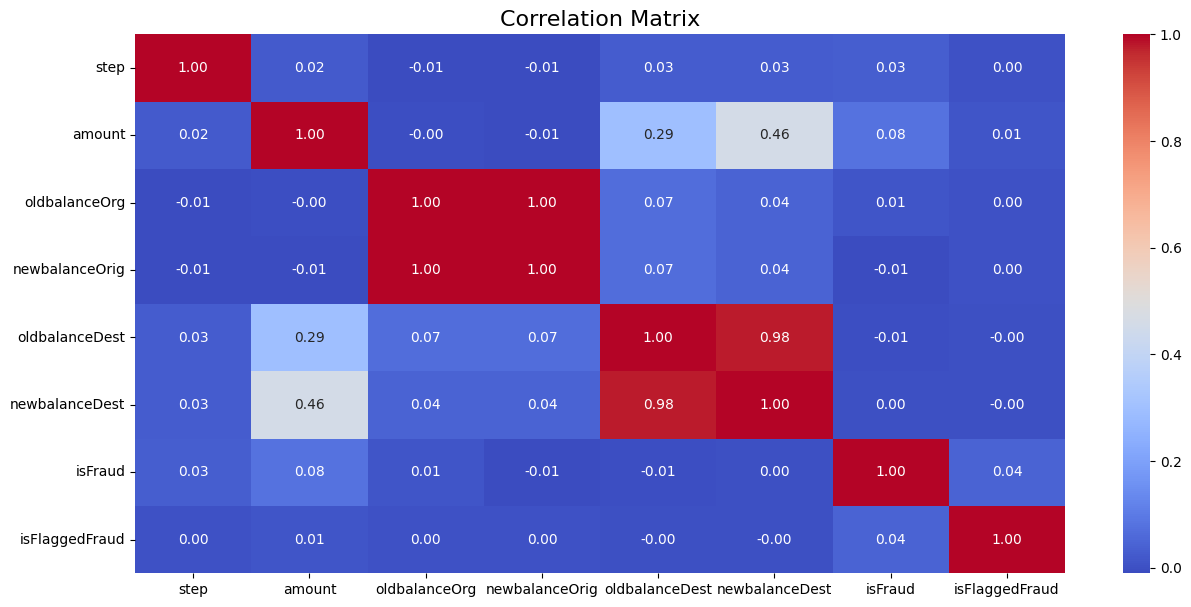

In [7]:
numeric_data = data.select_dtypes(include=['number'])
# Compute the correlation matrix for numeric data
correlation_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [8]:
##Correlation within Target

numeric_data.corr()['isFraud'].sort_values(ascending=False)[1:]

amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

Fraud Distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64


C:\Users\itcodes2\AppData\Local\Temp\ipykernel_12572\3253612870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  transaction_plot = sns.countplot(


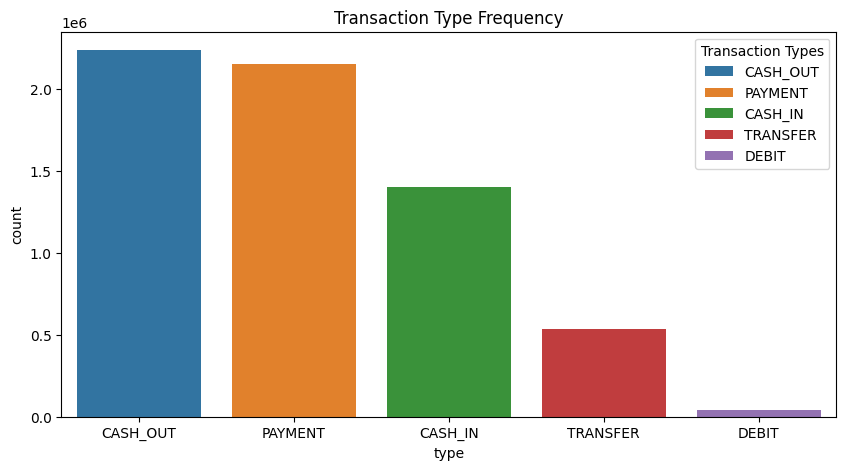

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [9]:
print("Fraud Distribution:")
print(data['isFraud'].value_counts())

# Define custom colors for each bar
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Add more colors as needed

# Visualize transaction types with custom colors
plt.figure(figsize=(10, 5))
transaction_plot = sns.countplot(
    data=data,
    x='type',
    order=data['type'].value_counts().index,
    palette=custom_colors[:len(data['type'].unique())]  # Use only as many colors as categories
)

# Add legend
legend_labels = data['type'].value_counts().index.tolist()  # Extract unique transaction types
for idx, bar in enumerate(transaction_plot.patches):
    bar.set_label(legend_labels[idx])

plt.legend(title='Transaction Types')
plt.title('Transaction Type Frequency')
plt.show()# Plot fraud amount distribution with unique customizations
plt.figure(figsize=(12, 6))




C:\Users\itcodes2\AppData\Local\Temp\ipykernel_12572\502384651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


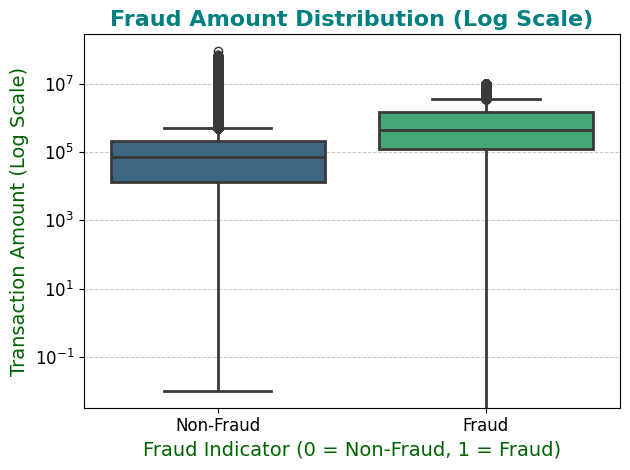

In [10]:
# Create a boxplot with enhanced styles
sns.boxplot(
    data=data, 
    x='isFraud', 
    y='amount', 
    palette='viridis',  # A distinct color palette
    linewidth=2  # Thicker lines for better visibility
)

# Log scale for the y-axis
plt.yscale('log')

# Customize the plot with distinct labels and styling
plt.title('Fraud Amount Distribution (Log Scale)', fontsize=16, fontweight='bold', color='teal')
plt.xlabel('Fraud Indicator (0 = Non-Fraud, 1 = Fraud)', fontsize=14, color='darkgreen')
plt.ylabel('Transaction Amount (Log Scale)', fontsize=14, color='darkgreen')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\itcodes2\AppData\Local\Temp\ipykernel_12572\2795980474.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['amount'], data['balanceDifference']], labels=['Transaction Amount', 'Balance Difference'])


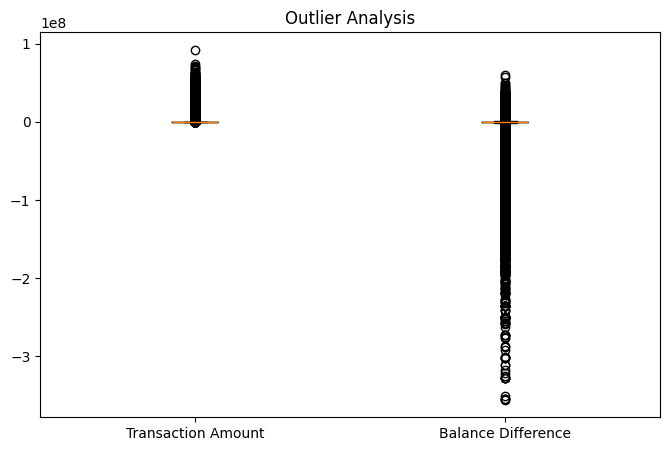

In [11]:
# Feature engineering
data['isFinancial'] = data['type'].apply(lambda x: 1 if x in ['PAYMENT', 'DEBIT'] else 0)
data['isTransfer'] = data['type'].apply(lambda x: 1 if x in ['CASH_OUT', 'TRANSFER'] else 0)
data['balanceDifference'] = data['oldbalanceOrg'] - data['oldbalanceDest']

# Check for anomalies
plt.figure(figsize=(8, 5))
plt.boxplot([data['amount'], data['balanceDifference']], labels=['Transaction Amount', 'Balance Difference'])
plt.title('Outlier Analysis')
plt.show()

In [12]:
# Remove extreme outliers
data = data[data['amount'] < 5_000_000]

# Prepare data for modeling
features = ['amount', 'isFinancial', 'isTransfer', 'balanceDifference']
X = data[features]
y = data['isFraud']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [14]:
# Train Gradient Boosting Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Model evaluation
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1902889     201]
 [    878    1364]]


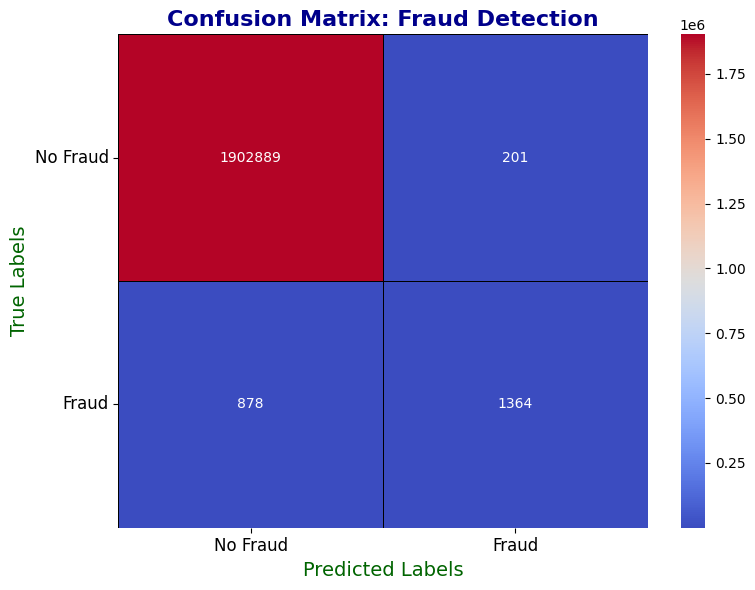

In [16]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Custom visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True,  # Annotate cells with values
    fmt='d',  # Integer formatting
    cmap='coolwarm',  # Unique color scheme
    linewidths=0.5,  # Add cell borders
    linecolor='black',  # Border color
    cbar=True  # Include color bar
)

# Add axis labels and title
plt.title('Confusion Matrix: Fraud Detection', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Predicted Labels', fontsize=14, color='darkgreen')
plt.ylabel('True Labels', fontsize=14, color='darkgreen')
plt.xticks(ticks=[0.5, 1.5], labels=['No Fraud', 'Fraud'], fontsize=12, color='black')
plt.yticks(ticks=[0.5, 1.5], labels=['No Fraud', 'Fraud'], fontsize=12, color='black', rotation=0)

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
# Classification report
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Feature importance analysis
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1903090
           1       0.87      0.61      0.72      2242

    accuracy                           1.00   1905332
   macro avg       0.94      0.80      0.86   1905332
weighted avg       1.00      1.00      1.00   1905332

Feature Importance:
             Feature  Importance
3  balanceDifference    0.576065
0             amount    0.406782
2         isTransfer    0.016908
1        isFinancial    0.000245


In [ ]:
# Enhanced Feature Importance Plot
plt.figure(figsize=(10, 6))

# Customizing the barplot
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df, 
    palette='Spectral',  # Use a vibrant, gradient color palette
    edgecolor='black',  # Add borders around bars
    linewidth=1.5  # Thickness of the borders
)

# Adding data labels to the bars
for i, value in enumerate(feature_importance_df['Importance']):
    plt.text(
        value + 0.01,  # Slightly offset to the right of the bar
        i,  # Vertical position of the text
        f"{value:.2f}",  # Format the value with 2 decimals
        va='center',  # Center align vertically
        ha='left',  # Left align horizontally
        fontsize=10,  # Font size
        color='black'  # Text color
    )

# Customizing title and labels
plt.title('Feature Importance Analysis', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Importance Score', fontsize=14, color='darkgreen')
plt.ylabel('Features', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Adding gridlines for clarity
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


### Confusion Matrix To Csv

In [ ]:
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted_No_Fraud', 'Predicted_Fraud'], 
                              index=['Actual_No_Fraud', 'Actual_Fraud'])

# Save to CSV
conf_matrix_df.to_csv('confusion_matrix.csv', index=True)


### Precision Recall to csv

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
print(precision)
print(recall)
# Create a DataFrame
pr_curve_df = pd.DataFrame({'Precision': precision[:-1],  # Exclude the last threshold-less value
                            'Recall': recall[:-1],
                            'Threshold': thresholds})

# Save to CSV
pr_curve_df.to_csv('precision_recall_curve.csv', index=False)
